In [257]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from varclushi import VarClusHi
from sklearn.model_selection import train_test_split
from sklearn import linear_model


## Checking the coherence of the data-simulated with the data from the original paper 

downloading data :

In [127]:
df_rho0 = pd.read_csv('/home/zack/HAX817X/Rho_0/58.csv')
df_rho2 = pd.read_csv('/home/zack/HAX817X/rho_0,2/14.csv')
df_rho5 = pd.read_csv('/home/zack/HAX817X/rho_0,5/85.csv')
df_rho8 = pd.read_csv('/home/zack/HAX817X/rho_0,8/1.csv')

Plotting the density function of a feature 'x10' given $\rho = 0.8$

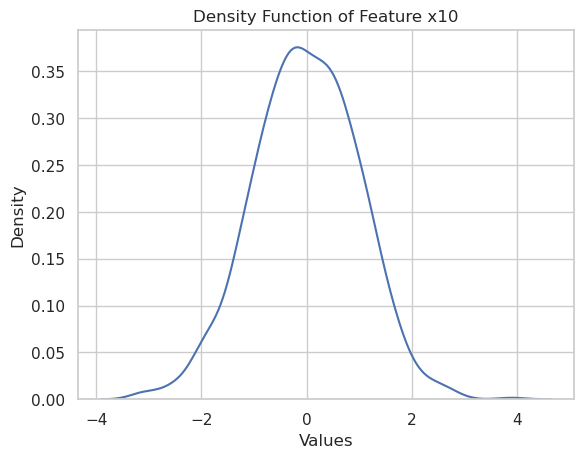

In [265]:
sns.set_style('whitegrid')
sns.kdeplot(data=df_8['x10'])
plt.title('Density Function of Feature x10')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

We notice that the feature 'x10' follows a Gaussian distribution with mean 0 and a standard deviation of 1.

Ploting Variance covariance heatmap for all the features when $\rho$ is near 0 : 

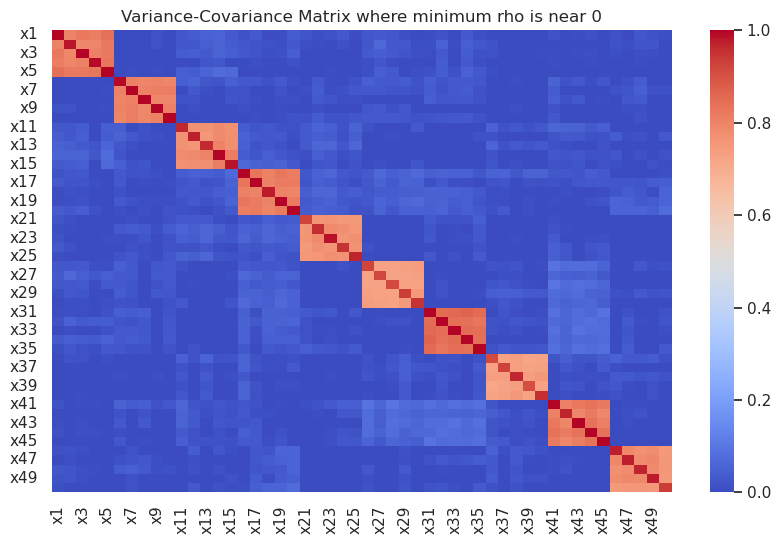

In [170]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_rho0.iloc[:,1:].cov(), annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Variance-Covariance Matrix where minimum rho is near 0')
plt.show()

- This confirms that all features have a variance equal to 1 due to the hot temperature of the diagonal values of this heat map. 
- We can see the pattern here, where each 5 successive features are highly correlated for any given $\rho$ which confirms that the data is grouped by 5 varaibles in each block.
- Let's zoom in (we'll take only two first groups and same things applies for the rest of the groups) for each rho given : 

$\rho = 0$

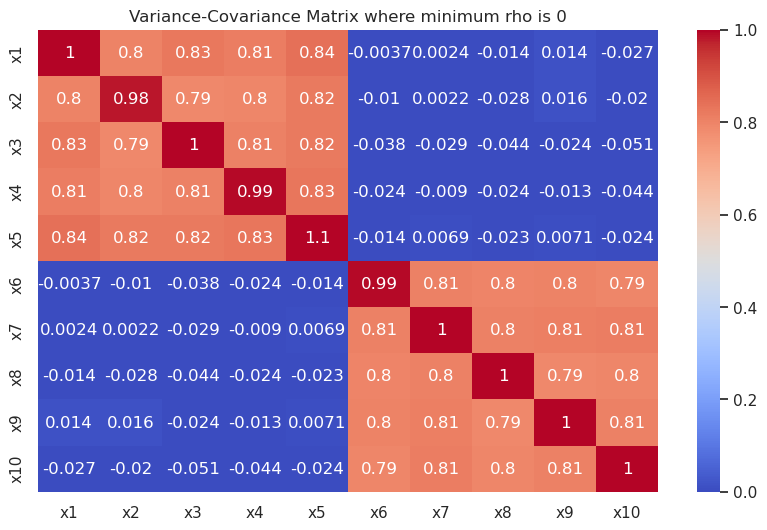

In [145]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_rho0.iloc[:,1:11].cov(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Variance-Covariance Matrix where minimum rho is 0')
plt.show()

$\rho = 0.2$

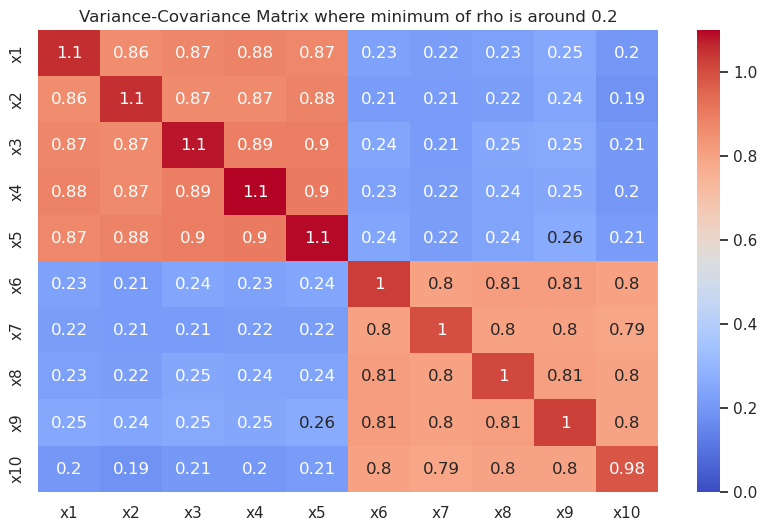

In [139]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_rho2.iloc[:,1:11].cov(), annot=True, cmap='coolwarm', vmin=0, vmax=1.1)
plt.title('Variance-Covariance Matrix where minimum of rho is around 0.2')
plt.show()

$\rho = 0.5$

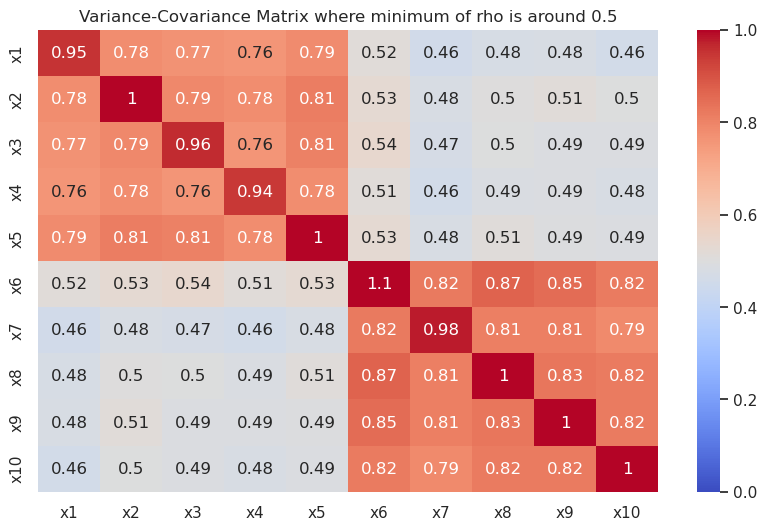

In [177]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_rho5.iloc[:,1:11].cov(), annot=True, cmap='coolwarm',vmin=0, vmax=1)
plt.title('Variance-Covariance Matrix where minimum of rho is around 0.5')
plt.show()

$\rho = 0.8$

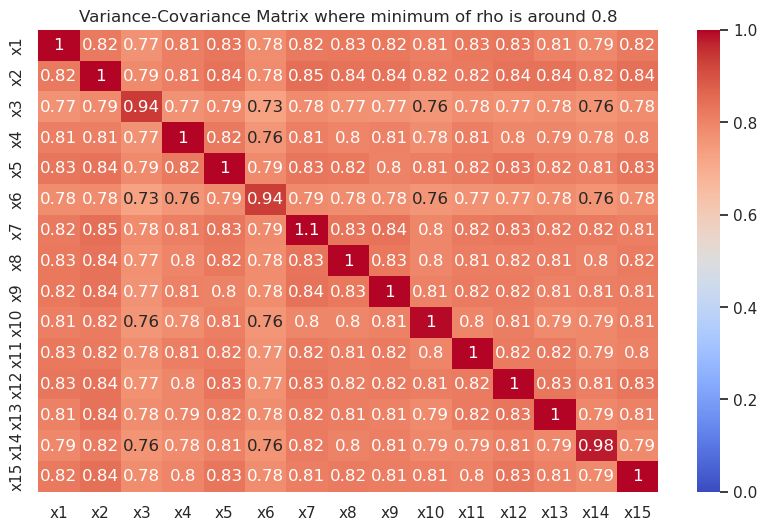

In [195]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_rho8.iloc[:,1:16].cov(), annot=True, cmap='coolwarm',vmin=0, vmax=1)
plt.title('Variance-Covariance Matrix where minimum of rho is around 0.8')
plt.show()

Clustering the features to confirm that each group has five features : 

In [207]:
df_cluster = VarClusHi(df_0.iloc[:,1:],maxeigval2=1,maxclus=None)
df_cluster.varclus()
df_0_cluster.rsquare[['Cluster','Variable']].T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Cluster,0,0,0,0,0,1,1,1,1,1,...,8,8,8,8,8,9,9,9,9,9
Variable,x26,x27,x28,x29,x30,x11,x12,x13,x14,x15,...,x36,x37,x38,x39,x40,x16,x17,x18,x19,x20


## Applying different models for the becnhmarks 

Marginal effects : A multivariate linear model is applied
to each group separately. Importance scores correspond
to ensuing p-values.